# Ćwiczenie 3. 
Celem ćwiczenia jest obserwacja widma sygnału EKG.
1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie
2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza
częstotliwość próbkowania.
3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w
punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ecg100
(można wyznaczyć różnicę sygnałów).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
if os.name == 'nt':
    file_name = "../src/"+input("Podaj nazwe pliku z danymi: ")
elif os.name == 'posix':
    file_name = "..//src//"+input("Podaj nazwe pliku z danymi: ")
else:
    print("Nieznany system")
data_frame = pd.read_csv(file_name,sep="\s+",header=None,engine="python")

print(data_frame)

### Zadanie nr1
Wczytano plik ekg100.txt zgodnie z treścią ćwiczenia.\
W celu oceny wizualnej wykorzystano bibliotekę matplotlib w celu wizualizacji funkcji wynikajacej z treści pliku tekstowego.

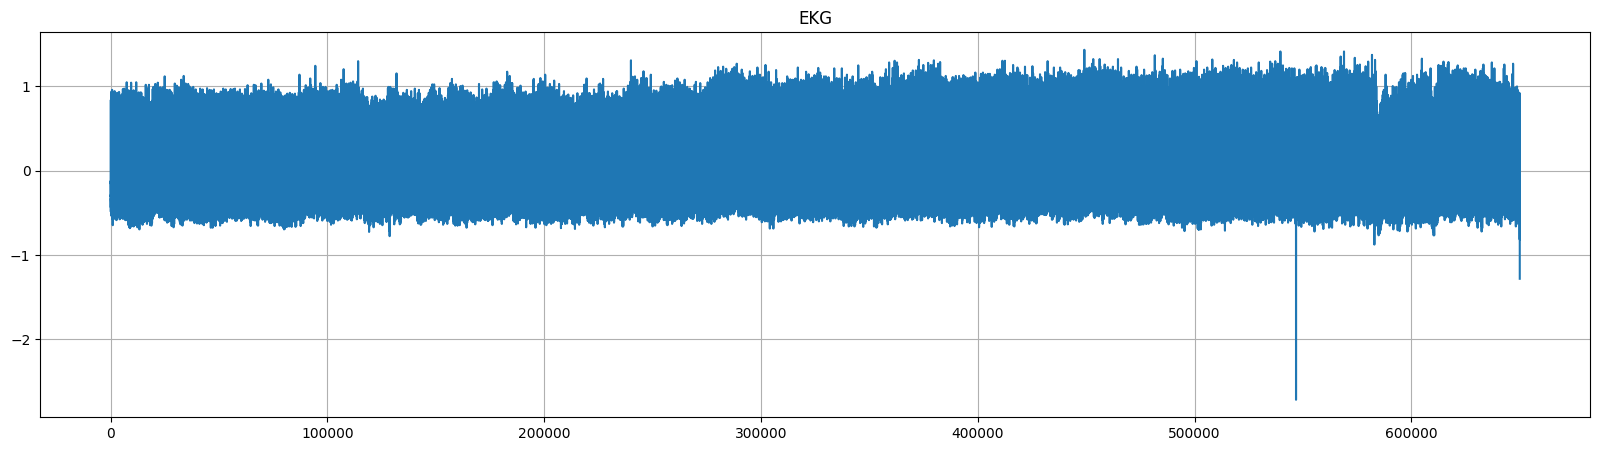

In [ ]:

data_frame.columns = ['data']
font = {'size':20}
plt.figure(figsize=(20,5))
plt.plot(data_frame['data']) #rysowanie wykresu
plt.grid(True)
plt.title("EKG")
plt.show()


### Zadanie nr2

Wyznaczono transformantę Fouriera korzystając z biblioteki numpy oraz funkcji fft.
Na podstawie transformanty przedstawiono widmo amplitudowe w funkcji częstotliwości.

Korzystając z zewnętrznych źródeł wykonano dodatkowe kroki w celu prawidłowego wyznaczenia widma amplitudowego:
- Wyprowadzono amplitudę transformanty Fouriera,
- Znormalizowano zakres amplitudy aby maksymalną wartością było 1,
- Wygenerowało prawidłowe częstotliwości dla zadanego zakresu,
- Wyznaczono widmo w dodatnim zakresie częstotliwości,


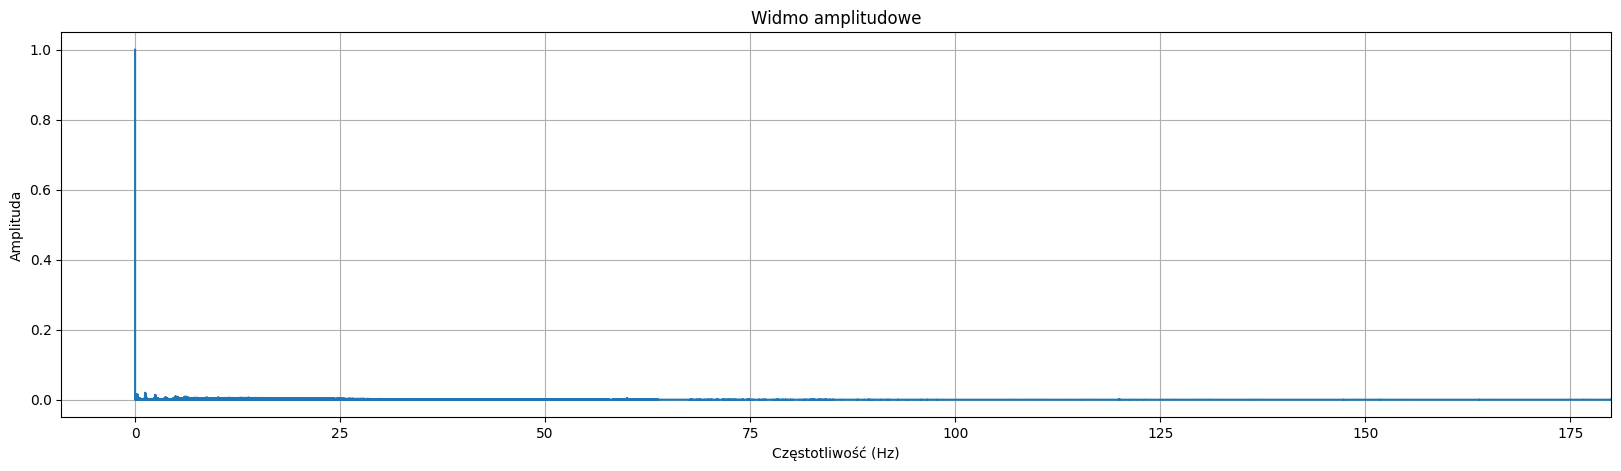

In [10]:
fs = 360
t = len(data_frame)

fourier1 = np.fft.fft(data_frame['data']) #transformata fouriera

#dodatkowe kroki
widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2] #częstotliwości w zakresie [0,fs/2]
pos_widmo = abs_widmo[:len(abs_widmo)//2] #widmo amplitudowe (część dodatnia)
#koniec dodatkowych kroków

plt.figure(figsize=(20,5))
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.show()


Wyznaczono odwrotną tranformantę Fouriera oraz porównano otrzymany ciąg z pierwotnym sygnałem.

Wyznaczoną różnicę zaznaczono pomarańczową linią przerywaną.

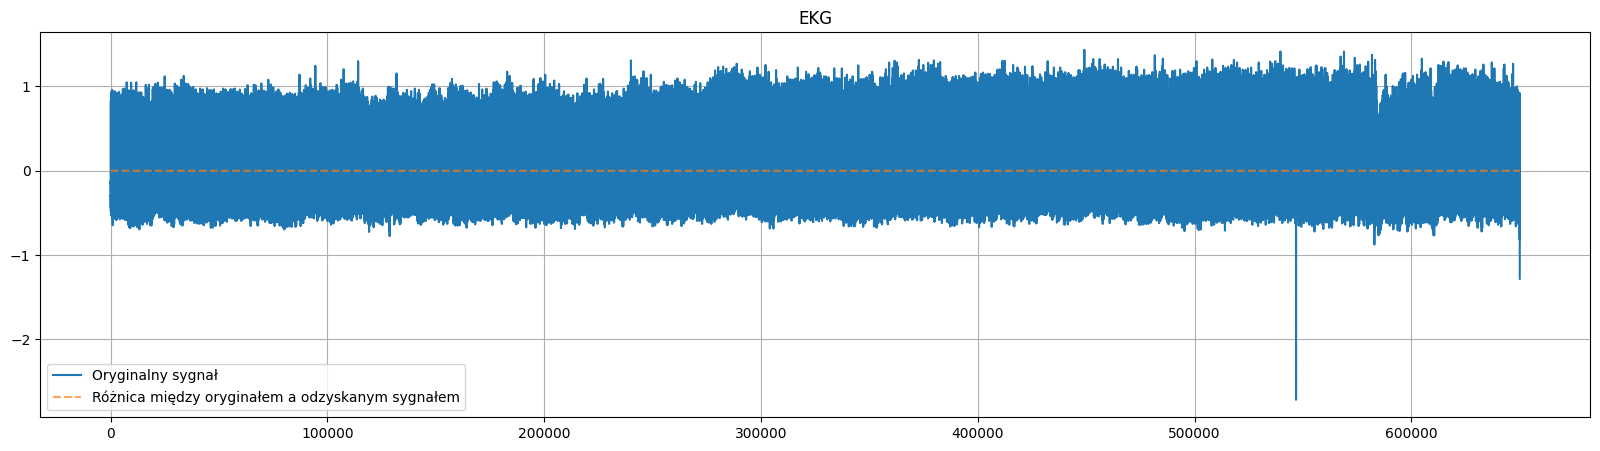

In [15]:
inv_fourier = np.fft.ifft(fourier1).real
inv_fourier = data_frame['data'] - inv_fourier
plt.figure(figsize=(20,5))
plt.plot(data_frame['data'], label="Oryginalny sygnał")
plt.plot(inv_fourier, linestyle="dashed", alpha=0.7, label="Różnica między oryginałem a odzyskanym sygnałem")
plt.grid(True)
plt.legend()
plt.title("EKG")
plt.show()


Można łatwo zauważyć że różnica sygnałów nieistnieje lub jest bardzo znikoma i wręcz nieodczytywalna.